In [1]:
# Basic binary Hopfield network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
'''See: https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners'''

import matplotlib.cm as cm # color maps

/Users/adammarblestone/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
num_neurons = 28*28

In [4]:
def zero_weight_matrix():
    return np.zeros(shape=(num_neurons, num_neurons))

In [5]:
def binarize(cont_state):
    new_state = []
    for k in cont_state:
        if k >= 0.5:
            new_state.append(1)
        else:
            new_state.append(0)
    return new_state

In [6]:
def to_minus_plus(binary_state):
    plusminus = [(-1.0)**(k+1) for k in binary_state]
    return plusminus

In [7]:
def random_state():
    neurons_binary_random = np.random.randint(0,2,size = num_neurons)
    neurons_plusminus_random = [(-1.0)**k for k in neurons_binary_random]
    return neurons_plusminus_random

In [8]:
def time_step(state, weight_matrix):
    new_state = []
    for k in range(len(state)):
        n = 0.0
        for j in range(len(state)):
            if j != k:
                n += weight_matrix[j][k]*state[j]
        if n >= 0.0:
            new_state.append(1.0)
        else:
            new_state.append(-1.0)
    return new_state

In [9]:
def store_memory(memory_state, weight_matrix):
    wm = np.copy(weight_matrix)
    for k in range(len(memory_state)):
        for j in range(len(memory_state)):
            if j != k:
                wm[j][k] += memory_state[j]*memory_state[k]
    return wm

In [10]:
def small_perturbation(perturb_size, state):
    r = random_state()
    new_state = np.zeros(len(state))
    prob = float(perturb_size)/float(len(state))
    for i in range(len(r)):
        if np.random.rand() < prob:
            new_state[i] = -1 * state[i]
        else:
            new_state[i] =state[i]
    return new_state

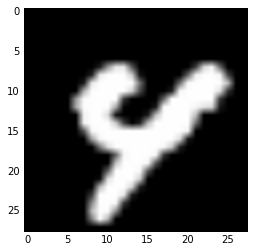

In [11]:
# Helper function for MNIST
def MNIST_row_as_image(row):
    arr1 = []
    for i in range(28):
        arr2 = []
        for j in range(28):
            arr2.append(row[28*i + j])
        arr1.append(arr2)
    return np.array(arr1)

image_example = MNIST_row_as_image(mnist.train.images[32171][:])

plt.figure()
plt.imshow(image_example, cmap = cm.Greys_r)

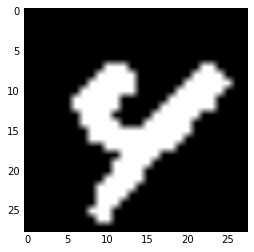

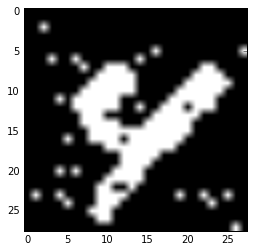

In [12]:
# Test some of these functions

unpert = to_minus_plus(binarize(mnist.train.images[32171][:]))

unpert_image_example = MNIST_row_as_image(unpert)
plt.figure()
plt.imshow(unpert_image_example, cmap = cm.Greys_r)

perturbed = small_perturbation(30, unpert)
perturbed_image_example = MNIST_row_as_image(perturbed)
plt.figure()
plt.imshow(perturbed_image_example, cmap = cm.Greys_r)

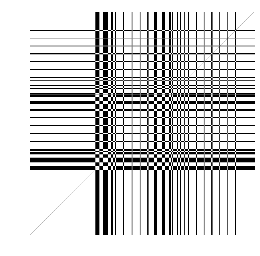

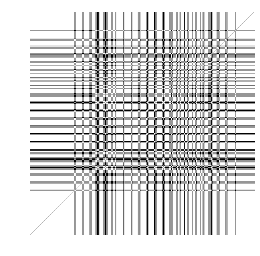

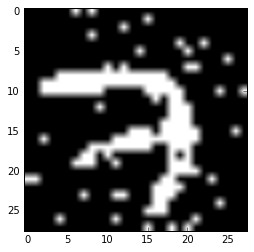

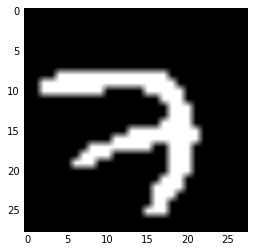

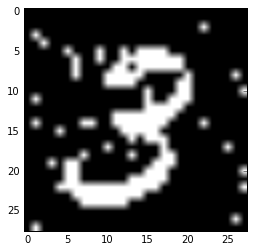

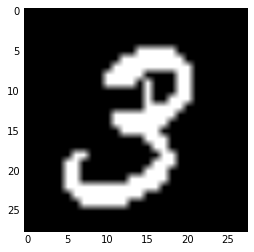

In [13]:
# Test Hopfield encoding and attractor dynamics
unpert = to_minus_plus(binarize(mnist.train.images[0][:]))
weights = store_memory(unpert, zero_weight_matrix())

plt.figure()
plt.axis('off')
plt.imshow(weights[:][::-1], cmap = cm.Greys_r)

unpert2 = to_minus_plus(binarize(mnist.train.images[1][:]))
weights = store_memory(unpert2, weights)

plt.figure()
plt.axis('off')
plt.imshow(weights[:][::-1], cmap = cm.Greys_r)

s = small_perturbation(30, unpert)
for i in range(2):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s), cmap = cm.Greys_r)
    s = time_step(s,weights)
    
s = small_perturbation(30, unpert2)
for i in range(2):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s), cmap = cm.Greys_r)
    s = time_step(s,weights)

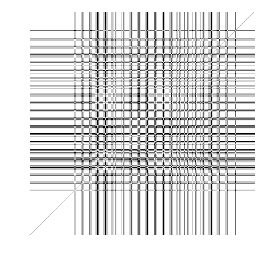

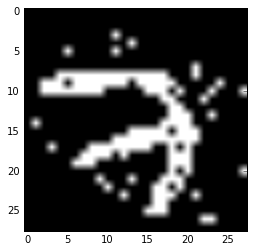

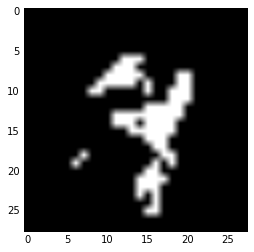

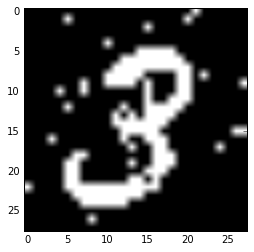

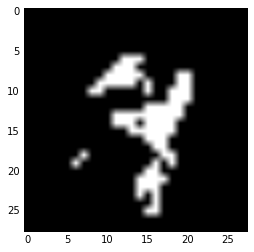

In [14]:
unpert3 = to_minus_plus(binarize(mnist.train.images[2][:]))
weights = store_memory(unpert3, weights)

plt.figure()
plt.axis('off')
plt.imshow(weights[:][::-1], cmap = cm.Greys_r)

s = small_perturbation(30, unpert)
for i in range(2):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s), cmap = cm.Greys_r)
    s = time_step(s,weights)
    
s = small_perturbation(30, unpert2)
for i in range(2):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s), cmap = cm.Greys_r)
    s = time_step(s,weights)

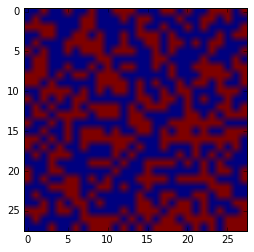

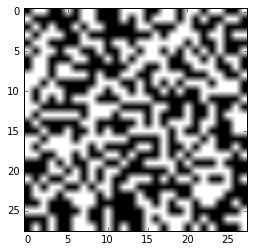

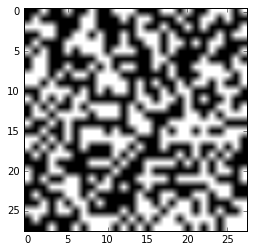

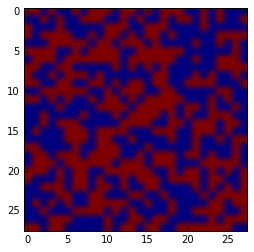

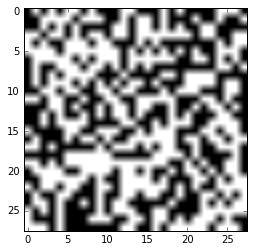

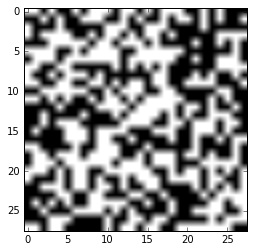

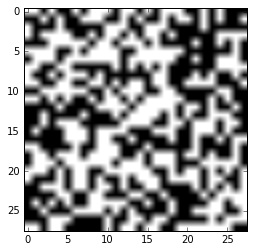

In [15]:
weights = store_memory(unpert, zero_weight_matrix())

pattern1 = random_state()
s1 = small_perturbation(250, pattern1)
weights = store_memory(pattern1, weights)

pattern2 = random_state()
s2 = small_perturbation(250, pattern2)
weights = store_memory(pattern2, weights)

pattern3 = random_state()
s3 = small_perturbation(250, pattern3)
weights = store_memory(pattern3, weights)

pattern4 = random_state()
s4 = small_perturbation(250, pattern4)
weights = store_memory(pattern4, weights)

pattern5 = random_state()
s5 = small_perturbation(250, pattern5)
weights = store_memory(pattern5, weights)

pattern6 = random_state()
s6 = small_perturbation(250, pattern6)
weights = store_memory(pattern6, weights)

plt.imshow(MNIST_row_as_image(pattern1))
for i in range(3):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s1), cmap = cm.Greys_r)
    s1 = time_step(s1,weights)
    
plt.imshow(MNIST_row_as_image(pattern2))
for i in range(3):
    plt.figure()
    plt.imshow(MNIST_row_as_image(s2), cmap = cm.Greys_r)
    s2 = time_step(s2,weights)

In [18]:
# Measure capacity

weights = store_memory(unpert, zero_weight_matrix())
test_pattern = random_state()
weights = store_memory(test_pattern, weights)
pert = small_perturbation(10, test_pattern)

run_results = []
for run in range(10):
    r = 0
    weights = store_memory(unpert, zero_weight_matrix())
    weights = store_memory(test_pattern, weights)
    for i in range(100):
        pattern = random_state()
        weights = store_memory(pattern, weights)
        s = time_step(pert,weights)
        if np.array_equal(s, test_pattern):
            r = i
    run_results.append(r)
    print r

print "Average percent capacity (random patterns / neurons):"
print 100*np.mean(run_results)/float(28*28)

86
49
74
57
97
72
87
72
66
99
Average percent capacity (random patterns / neurons):
9.68112244898


In [19]:
# Measure capacity at a different basin size

weights = store_memory(unpert, zero_weight_matrix())
test_pattern = random_state()
weights = store_memory(test_pattern, weights)
pert = small_perturbation(200, test_pattern)

run_results = []
for run in range(10):
    r = 0
    weights = store_memory(unpert, zero_weight_matrix())
    weights = store_memory(test_pattern, weights)
    for i in range(100):
        pattern = random_state()
        weights = store_memory(pattern, weights)
        s = time_step(pert,weights)
        if np.array_equal(s, test_pattern):
            r = i
    run_results.append(r)
    print r

print "Average percent capacity (random patterns / neurons):"
print 100*np.mean(run_results)/float(28*28)

21
14
26
13
26
22
28
15
29
34
Average percent capacity (random patterns / neurons):
2.90816326531
